## General instructions

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel/runtime** (Colab: in the menubar, select *Runtime*$\rightarrow$*Factory Reset Runtime*; Jupyter: in the menubar, select *Kernel*$\rightarrow$*Restart*) and then **run all cells** (Colab: in the menubar, select *Runtime*$\rightarrow$*Run all*; Jupyter: in the menubar, select *Cell*$\rightarrow$*Run All*).

Make sure you fill in any place that says `YOUR CODE HERE` or `"YOUR ANSWER HERE"`, as well as the list of the group members in the following cell.

Enter here the *Group Name* and the list of *Group Members*.

`Doi eletronics`

`Burco Lorenzo, Persello Riccardo`

In order to be able to have an evaluation DO NOT delete/cut the cells with code and answers. Once you have finished you can downolad the notebook (Colab: in the menubar, select *File*$\rightarrow$*Download .ipynb*; Jupyter: in the menubar, select *File*$\rightarrow$*Download as*$\rightarrow$*Notebook (.ipynb)*) and upload as an assignment on the e-learning platform.

The following cell will load the Google Drive extension for the current notebook, when the variable `MOUNT` is `True`. This allow you to mount the Google Drive filesystem for file persistence. The mountpoint will be `/content/gdrive`.
Furthermore, it will set the `PATH` variable, from now on, so that if you have to refer to external files you could do that by writing:

```python
os.path.join(PATH, filename)
```

This will append the filename after the specific PATH.

In [102]:
import os
MOUNT = False
if 'google.colab' in str(get_ipython()) and MOUNT:
    from google.colab import drive
    drive.mount('/content/gdrive')
    PATH = '/content/gdrive/MyDrive'
else:
    PATH = '.'

# Important warning

**⚠️ avoid copying, removing or modifying test cells, if you do that your assignment might be graded wrongly ⚠️**

---

This notebook will deal with the Employee Attrition dataset, describing a possible analysis workflow for frequent itemsets and association rules.

In a nutshell, association analysis is an unsupervised machine learning method that tries to identify frequent patterns in *transactions* (it is also known as *marketbasket analysis*), i.e., associations that occur more often than just being there for chance.

In the specific case we associate each employee with his/her characteristics and we will try to find the frequent combination of features that occur when the employees do/do not have **attrition**. To this aim we will transform the dataset so that each employee will be represented by the itemset of his/her feature values (e.g., the department which he/she works for, the business travel frequency, the education level, etc.).

In this case there is not specific assertion but the outcome of the analysis will be graded manually. In general, you can add multiple cells below a task assignment for performing the task.

# Step 1

Load the Employee Attrition Dataset from the `pkl` file and inspect if there are missing values inside the dataset. In the affirmative case, try to identify them.

To this aim, a helpful tool could be the [`missingno` library](https://github.com/ResidentMario/missingno). Give a look at it trying to understand how to use it.

/opt/homebrew/Caskroom/miniconda/base/envs/DAML/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:2847: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


<Axes: >

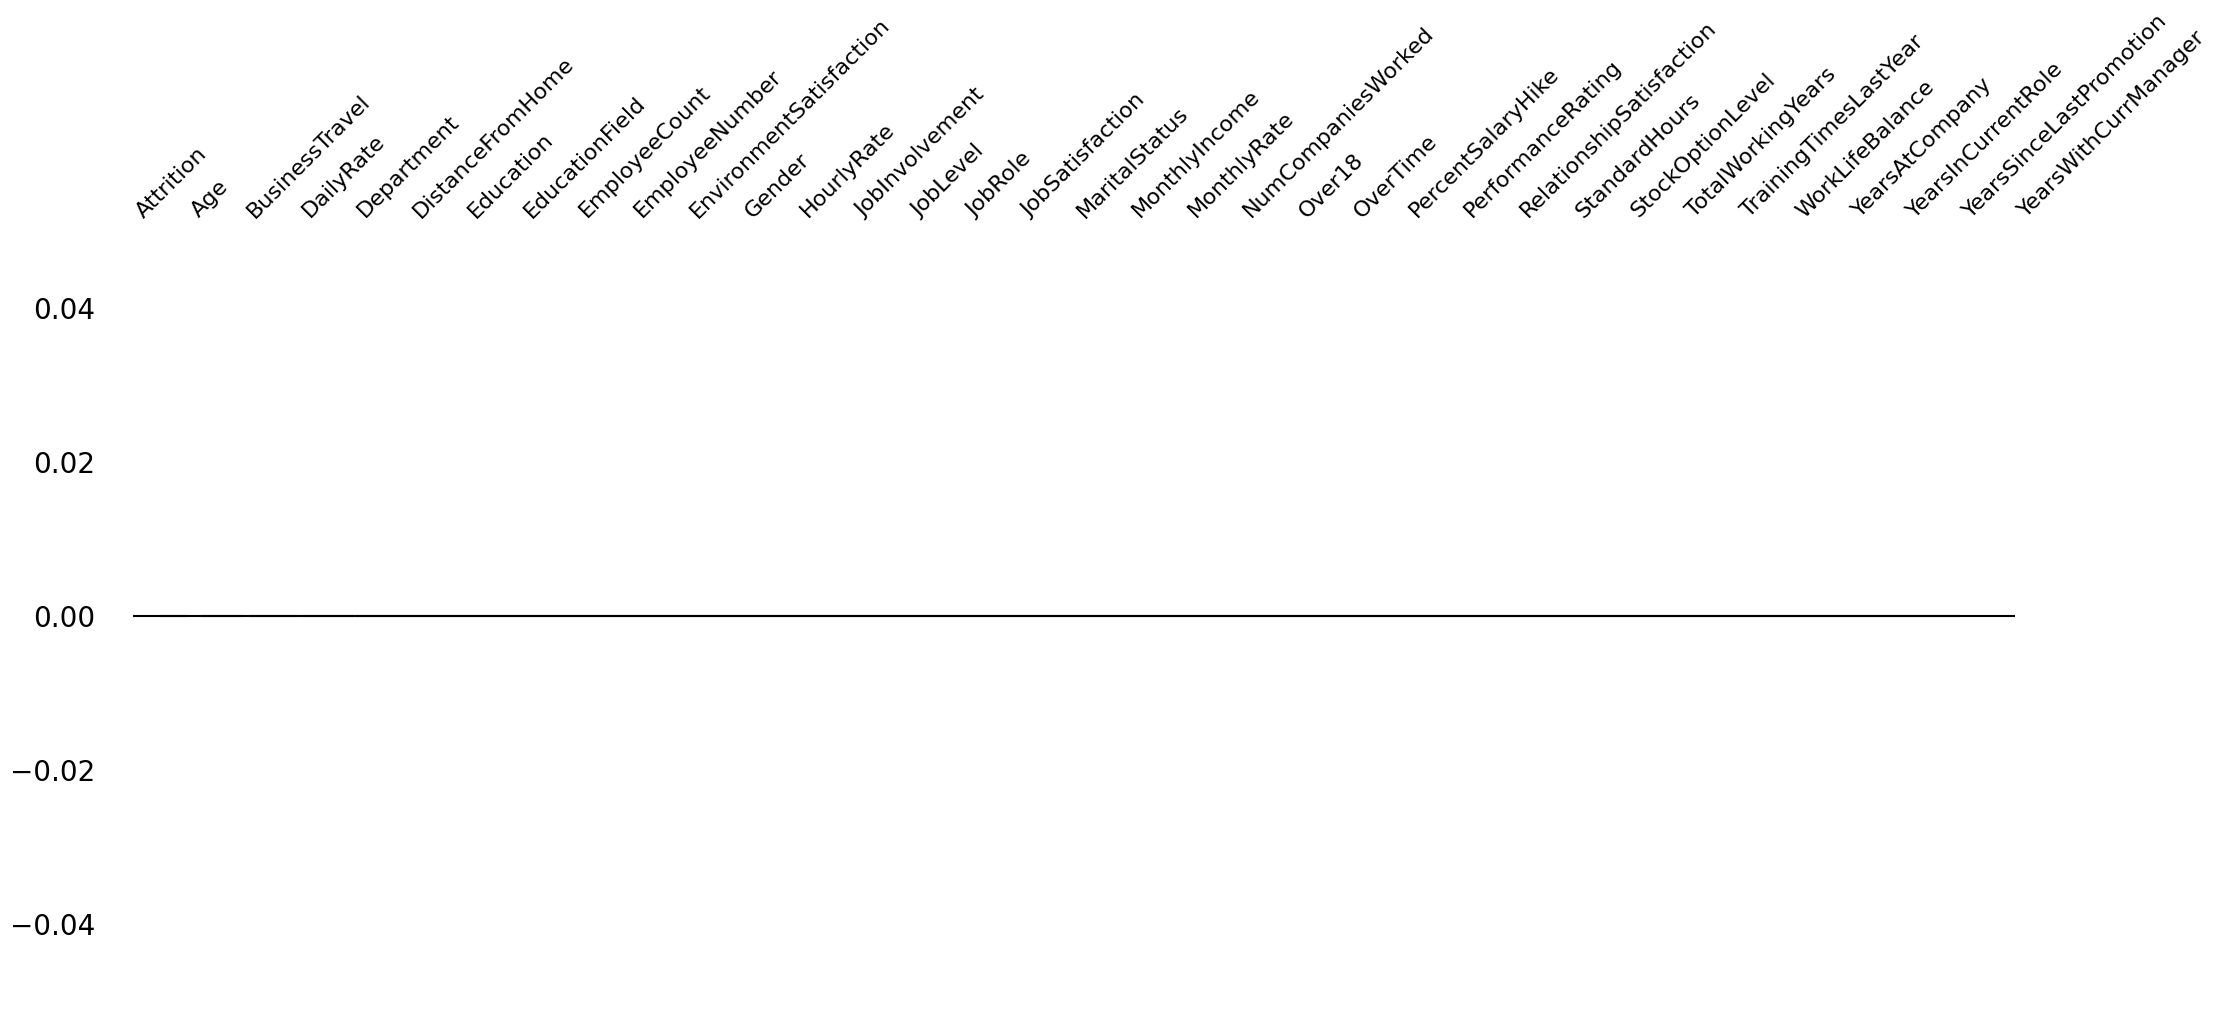

In [103]:
try:
    import missingno
except ImportError:
    os.system('pip install missingno')

import pandas as pd

df = pd.read_pickle('employee-attrition.pkl')

%matplotlib inline
missingno.dendrogram(df)


# Step 2

Frequent itemset and association analyses are required to deal with categorical data. Categorical data are qualitative information that can be stored and identified based on their names or labels (e.g., gender, age group, educational level, satisfaction level). It might be ordered when they refer to some quantitative dimension that can be ordered (e.g., age group [20, 30) precedes age group [30, 40)). Not necessarily a categorical variable is a string or a label, but it might also be encoded with a numerical value (e.g., satisfaction level in a Likert scale ranging from 1 to 5).

Identify the categorical variables in the data set, also looking at the data dictionary on kaggle. Notice that those variables could also have an integer encoding, therefore for each (integer) numerical variable briefly indicate the motivation why it is not categorical.

Write down, in the following cell, a brief statement with your observations about the outcome of this preliminary analysis.

There are many variables that are categorical by nature, and most of the numerical ones can be split into bins, as they are quantitative. Some of the variables are represented numerically, but actually are categorical, and two numerical variables (EmployeeCount and EmployeeNumber) can not be converted to categorical, as they are not quantitative dimensions.

# Step 3

Also the numerical variables of the dataset conceive relevant information for the analyses. Therefore, we want to transform them into categorical ones. Specifically:

1. among the numerical variables, identify those which might be meaningful for characterizing the employee (e.g., the age) and those which are not (e.g., the Employee Number which is basically a primary key in the DB).
2. the meaningful numerical variables should be transformed into categorical by means of *discretization*, or *binning*. There are several approaches to discretization (you might look at (this medium article)[https://towardsdatascience.com/an-introduction-to-discretization-in-data-science-55ef8c9775a2) for a review, but basically the two major approaches for transforming a $[\alpha, \beta]$ interval into its discretized counterpart consisting of $n$ categories, are *equal-width* discretization ($w = \frac{\beta - \alpha}{n}$ and each category $c_i, i = 0, \ldots, n - 1$ is an interval $c_i = [\alpha + i \cdot w, \alpha + (i + 1) \cdot w)$ such that $v$ is encoded in category $i$ if $v \in c_i$ (in pandas the method is called `pd.cut()`). The other approach, instead, called *equal-frequency*, defines a series of $n$ breakpoints $b_i, i = 0, \ldots, n - 1$, such that the intervals $c_i = [\alpha + b_i, \alpha + b_{i + 1})$ will contain the same amount of values (i.e., about $\frac{m}{n}$, where $m$ is the size of the dataset, in pandas the method is called `pd.qcut()`). For simplicity, for this analysis I suggest to use the *equal-frequency* approach, using 4 categories.

The transformed dataset, at the end of this preparation task, should comprise only categorical variables.

In [104]:
# Drop all the columns that are not meaningful.
df = df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'StandardHours'])

def cut4(cols: [str]):
    for name in cols:
        df[name] = pd.qcut(df[name], 4, duplicates='drop')

# Convert numeric variables to categorical.
cut4(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'])

df


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,"(36.0, 43.0]",Yes,Travel_Rarely,"(802.0, 1157.0]",Sales,"(0.999, 2.0]",2,Life Sciences,2,Female,...,3,1,0,"(6.0, 10.0]","(-0.001, 2.0]",1,"(5.0, 9.0]","(3.0, 7.0]","(-0.001, 1.0]","(3.0, 7.0]"
1,"(43.0, 60.0]",No,Travel_Frequently,"(101.999, 465.0]",Research & Development,"(7.0, 14.0]",1,Life Sciences,3,Male,...,4,4,1,"(6.0, 10.0]","(2.0, 3.0]",3,"(9.0, 40.0]","(3.0, 7.0]","(-0.001, 1.0]","(3.0, 7.0]"
2,"(36.0, 43.0]",Yes,Travel_Rarely,"(1157.0, 1499.0]",Research & Development,"(0.999, 2.0]",2,Other,4,Male,...,3,2,0,"(6.0, 10.0]","(2.0, 3.0]",3,"(-0.001, 3.0]","(-0.001, 2.0]","(-0.001, 1.0]","(-0.001, 2.0]"
3,"(30.0, 36.0]",No,Travel_Frequently,"(1157.0, 1499.0]",Research & Development,"(2.0, 7.0]",4,Life Sciences,4,Female,...,3,3,0,"(6.0, 10.0]","(2.0, 3.0]",3,"(5.0, 9.0]","(3.0, 7.0]","(1.0, 3.0]","(-0.001, 2.0]"
4,"(17.999, 30.0]",No,Travel_Rarely,"(465.0, 802.0]",Research & Development,"(0.999, 2.0]",1,Medical,1,Male,...,3,4,1,"(-0.001, 6.0]","(2.0, 3.0]",3,"(-0.001, 3.0]","(-0.001, 2.0]","(1.0, 3.0]","(-0.001, 2.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,"(30.0, 36.0]",No,Travel_Frequently,"(802.0, 1157.0]",Research & Development,"(14.0, 29.0]",2,Medical,3,Male,...,3,3,1,"(15.0, 40.0]","(2.0, 3.0]",3,"(3.0, 5.0]","(-0.001, 2.0]","(-0.001, 1.0]","(2.0, 3.0]"
1466,"(36.0, 43.0]",No,Travel_Rarely,"(465.0, 802.0]",Research & Development,"(2.0, 7.0]",1,Medical,4,Male,...,3,1,1,"(6.0, 10.0]","(3.0, 6.0]",3,"(5.0, 9.0]","(3.0, 7.0]","(-0.001, 1.0]","(3.0, 7.0]"
1467,"(17.999, 30.0]",No,Travel_Rarely,"(101.999, 465.0]",Research & Development,"(2.0, 7.0]",3,Life Sciences,2,Male,...,4,2,1,"(-0.001, 6.0]","(-0.001, 2.0]",3,"(5.0, 9.0]","(-0.001, 2.0]","(-0.001, 1.0]","(2.0, 3.0]"
1468,"(43.0, 60.0]",No,Travel_Frequently,"(802.0, 1157.0]",Sales,"(0.999, 2.0]",3,Medical,4,Male,...,3,4,0,"(15.0, 40.0]","(2.0, 3.0]",2,"(5.0, 9.0]","(3.0, 7.0]","(-0.001, 1.0]","(7.0, 17.0]"


# Step 4

Given the preprocessed data, you have to convert into the format that is expected by the `mlxtend` library for frequent patterns. You can have a look [here](http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.frequent_patterns/) for the documentation.

In particular the *one-hot* encoding is required, i.e., a dataframe whose columns corresponds to the different items and the rows are the invoices. Each value is the binary indicator of the fact that that row (i.e., invoice) contains or not that item. Here is an example of the expected format:

|Index|Bread|Coke|Milk|Beer|Diaper|
|-----|-----|----|----|----|------|
|1    |1    |1   |1   |0   |0     |
|2    |1    |0   |0   |1   |1     |
|3    |0    |1   |0   |1   |1     |
|4    |1    |0   |1   |1   |1     |
|5    |0    |1   |1   |0   |1     |
|.....|...  |... |... |... |...   |

This can be achieved through the `pd.get_dummies()` method, search for it.

In [105]:
onehot = pd.get_dummies(df, columns=df.columns)

onehot

,"Age_(17.999, 30.0]","Age_(30.0, 36.0]","Age_(36.0, 43.0]","Age_(43.0, 60.0]",Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,"DailyRate_(101.999, 465.0]",...,"YearsInCurrentRole_(2.0, 3.0]","YearsInCurrentRole_(3.0, 7.0]","YearsInCurrentRole_(7.0, 18.0]","YearsSinceLastPromotion_(-0.001, 1.0]","YearsSinceLastPromotion_(1.0, 3.0]","YearsSinceLastPromotion_(3.0, 15.0]","YearsWithCurrManager_(-0.001, 2.0]","YearsWithCurrManager_(2.0, 3.0]","YearsWithCurrManager_(3.0, 7.0]","YearsWithCurrManager_(7.0, 17.0]"
0,False,False,True,False,False,True,False,False,True,False,...,False,True,False,True,False,False,False,False,True,False
1,False,False,False,True,True,False,False,True,False,True,...,False,True,False,True,False,False,False,False,True,False
2,False,False,True,False,False,True,False,False,True,False,...,False,False,False,True,False,False,True,False,False,False
3,False,True,False,False,True,False,False,True,False,False,...,False,True,False,False,True,False,True,False,False,False
4,True,False,False,False,True,False,False,False,True,False,...,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,True,False,False,True,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
1466,False,False,True,False,True,False,False,False,True,False,...,False,True,False,True,False,False,False,False,True,False
1467,True,False,False,False,True,False,False,False,True,True,...,False,False,False,True,False,False,False,True,False,False
1468,False,False,False,True,True,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,True


The [FP-Growth](https://en.wikibooks.org/wiki/Data_Mining_Algorithms_In_R/Frequent_Pattern_Mining/The_FP-Growth_Algorithm) algorithm is an alternative algorithm for determining frequent itemsets based on a peculiar and efficient data structure called FP-tree (it stores the compressed information). You can give a look at the linked document or better at [this blog article](https://towardsdatascience.com/understand-and-build-fp-growth-algorithm-in-python-d8b989bab342) if you are interested in the details of the algorithm.

The `fp_growth` function is already implemented in the `mlxtend` library. 

Use this algorithm to compute the frequent items in the transformed dataset, with a support threshold of 0.05 and of maximum length of 4. Inspect the itemsets extracted.

In [106]:
from mlxtend.frequent_patterns import fpgrowth

itemsets = fpgrowth(onehot, 0.05, True, 4)

itemsets

,support,itemsets
0,1.000000,(Over18_Y)
1,0.846259,(PerformanceRating_3)
2,0.709524,(BusinessTravel_Travel_Rarely)
3,0.638095,"(YearsSinceLastPromotion_(-0.001, 1.0])"
4,0.590476,(JobInvolvement_3)
...,...,...
77232,0.050340,"(Attrition_No, EducationField_Technical Degree..."
77233,0.055782,"(WorkLifeBalance_3, EducationField_Technical D..."
77234,0.068027,"(Attrition_No, EducationField_Technical Degree..."
77235,0.060544,"(Attrition_No, EducationField_Technical Degree..."


# Association rules

Once frequent item sets have been computed it is meaningful to transform them into causal rules, called *association rules*. These rules have the form $Age\_Range\_(36.0, 43.0] \rightarrow Attrition\_No$, indicating that there is a direction in the relation of the common occurrence of the feature values. 

In order to measure the quality of these rules (recall the method is unsupervised, and we need a metric), a popular choice is using the *lift*. Specifically, $\mathrm{lift}(A \rightarrow B) = \frac{\mathrm{freq}(A \cup B)}{\mathrm{freq}(A) \cdot \mathrm{freq}(B)}$, and values greater than 1 indicate a meaningful relation.

Another metric is the *confidence*, which is the probability of finding the item set $B$ given that $A$ has been found, i.e., $\mathrm{confidence}(A \rightarrow B) = \frac{\mathrm{freq}(A \cup B)}{\mathrm{freq}(A)}$.    

Use the frequent items computed in the previous step to find the association rules whose lift is greater than 1.

In [107]:
from mlxtend.frequent_patterns import association_rules

itemsets_lift_over_one = association_rules(itemsets, metric="lift", min_threshold=1.0)

itemsets_lift_over_one

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(PerformanceRating_3),(Over18_Y),0.846259,1.000000,0.846259,1.000000,1.000000,0.000000,inf,0.000000
1,(Over18_Y),(PerformanceRating_3),1.000000,0.846259,0.846259,0.846259,1.000000,0.000000,1.000000,0.000000
2,(BusinessTravel_Travel_Rarely),(Over18_Y),0.709524,1.000000,0.709524,1.000000,1.000000,0.000000,inf,0.000000
3,(Over18_Y),(BusinessTravel_Travel_Rarely),1.000000,0.709524,0.709524,0.709524,1.000000,0.000000,1.000000,0.000000
4,(PerformanceRating_3),(BusinessTravel_Travel_Rarely),0.846259,0.709524,0.604762,0.714630,1.007197,0.004321,1.017894,0.046478
...,...,...,...,...,...,...,...,...,...,...
583819,"(Attrition_No, EducationField_Technical Degree...",(PerformanceRating_3),0.068027,0.846259,0.060544,0.890000,1.051688,0.002976,1.397650,0.052735
583820,"(Attrition_No, EducationField_Technical Degree)","(PerformanceRating_3, Over18_Y)",0.068027,0.846259,0.060544,0.890000,1.051688,0.002976,1.397650,0.052735
583821,"(PerformanceRating_3, Over18_Y)","(Attrition_No, EducationField_Technical Degree)",0.846259,0.068027,0.060544,0.071543,1.051688,0.002976,1.003787,0.319678
583822,(PerformanceRating_3),"(Attrition_No, EducationField_Technical Degree...",0.846259,0.068027,0.060544,0.071543,1.051688,0.002976,1.003787,0.319678


# Step 7

Since we are interested in investigating the attrition phenomenon, extract from the association rules those having `Attrition_Yes` or `Attrition_No` as a consequent (i.e., those of the form `A` $\rightarrow$ `Attrition_Yes` and `A` $\rightarrow$ `Attrition_No`).

Pay attention that the values of the association rules columns are frozen sets, like, e.g., `frozenset({'Attrition_No'})`.

In [108]:
itemsets_attrition = itemsets_lift_over_one[(itemsets_lift_over_one['consequents'] == frozenset({'Attrition_No'})) | (itemsets_lift_over_one['consequents'] == frozenset({'Attrition_Yes'}))]

result = itemsets_attrition.sort_values('lift', ascending=False)

result

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
162765,"(JobLevel_1, OverTime_Yes)",(Attrition_Yes),0.106122,0.161224,0.055782,0.525641,3.260305,0.038673,1.768229,0.775587
162846,"(JobLevel_1, OverTime_Yes, Over18_Y)",(Attrition_Yes),0.106122,0.161224,0.055782,0.525641,3.260305,0.038673,1.768229,0.775587
162749,"(StockOptionLevel_0, OverTime_Yes)",(Attrition_Yes),0.123810,0.161224,0.055782,0.450549,2.794547,0.035821,1.526571,0.732900
162808,"(StockOptionLevel_0, OverTime_Yes, Over18_Y)",(Attrition_Yes),0.123810,0.161224,0.055782,0.450549,2.794547,0.035821,1.526571,0.732900
164062,"(JobLevel_1, StockOptionLevel_0, YearsInCurren...",(Attrition_Yes),0.122449,0.161224,0.053061,0.433333,2.687764,0.033319,1.480192,0.715564
...,...,...,...,...,...,...,...,...,...,...
372879,"(RelationshipSatisfaction_3, NumCompaniesWorke...",(Attrition_No),0.143537,0.838776,0.120408,0.838863,1.000104,0.000012,1.000540,0.000121
372858,"(RelationshipSatisfaction_3, NumCompaniesWorke...",(Attrition_No),0.143537,0.838776,0.120408,0.838863,1.000104,0.000012,1.000540,0.000121
1402,"(JobInvolvement_3, TrainingTimesLastYear_(-0.0...",(Attrition_No),0.185714,0.838776,0.155782,0.838828,1.000062,0.000010,1.000325,0.000077
165759,(Over18_Y),(Attrition_No),1.000000,0.838776,0.838776,0.838776,1.000000,0.000000,1.000000,0.000000


# Step 8

Write down your observations among the frequent patterns dealing with attrition, what can you deduce from the analysis of those patterns?

People who work overtime, have low job levels, no stock options, employeed for less than 2 years in the current role and low monthly income tend to have attrition.
Those who have no attrition show that they have really high monthly income, are more satisfied and generally don't work overtime.